In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math

**Data**

In [ ]:
URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file("cats_and_dogs_filtered.zip", origin=URL, extract=True)



In [ ]:
print(zip_dir)
base_dir = os.path.dirname(zip_dir)
print(base_dir)
!find $base_dir -type d -print

/root/.keras/datasets/cats_and_dogs_filtered.zip
/root/.keras/datasets
/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [ ]:
train_dir = os.path.join(base_dir, "cats_and_dogs_filtered/train")
validation_dir = os.path.join(base_dir, "cats_and_dogs_filtered/validation")
train_dogs_dir = os.path.join(base_dir, "cats_and_dogs_filtered/train/dogs")
train_cats_dir = os.path.join(base_dir, "cats_and_dogs_filtered/train/cats")
validation_dogs_dir = os.path.join(base_dir, "cats_and_dogs_filtered/validation/dogs")
validation_cats_dir = os.path.join(base_dir, "cats_and_dogs_filtered/validation/cats")

In [ ]:
print(len(os.listdir(train_dir)))
print(len(os.listdir(validation_dir)))
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_cats_dir)))

2
2
1000
1000
500
500


**Data preparation**

In [ ]:
BATCH_SIZE = 100
IMG_SHAPE = 150


In [ ]:
train_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=45, zoom_range=0.2, height_shift_range=0.2, shear_range=0.2, width_shift_range=0.2 )
validation_data_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_data_process = train_data_gen.flow_from_directory(directory=train_dir, target_size=(150, 150), shuffle = True, class_mode="binary", batch_size=BATCH_SIZE)
validation_data_process = validation_data_gen.flow_from_directory(directory=validation_dir, target_size=(150, 150), shuffle = False,   class_mode="binary", batch_size=BATCH_SIZE)

print(type(train_data_process))
train_data_firstbatchfeatures, train_data_firstbatchlabels = train_data_process[0]
print(train_data_firstbatchfeatures)
print(type(train_data_firstbatchfeatures))
print( train_data_firstbatchlabels)
print(type(train_data_firstbatchlabels))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
<class 'tensorflow.python.keras.preprocessing.image.DirectoryIterator'>
[[[[0.8000001  0.79215693 0.8431373 ]
   [0.8000001  0.79215693 0.8431373 ]
   [0.8000001  0.79215693 0.8431373 ]
   ...
   [0.85372293 0.837806   0.86799955]
   [0.8699371  0.8241806  0.8738587 ]
   [0.8706347  0.80604476 0.8726187 ]]

  [[0.8000001  0.79215693 0.8431373 ]
   [0.8000001  0.79215693 0.8431373 ]
   [0.8000001  0.79215693 0.8431373 ]
   ...
   [0.8496994  0.8409393  0.86718476]
   [0.8652576  0.8245529  0.87107253]
   [0.8706353  0.8113001  0.8740622 ]]

  [[0.8000001  0.79215693 0.8431373 ]
   [0.8000001  0.79215693 0.8431373 ]
   [0.8000001  0.79215693 0.8431373 ]
   ...
   [0.8463197  0.8436301  0.8664203 ]
   [0.85365576 0.8229391  0.8658079 ]
   [0.8673336  0.8160476  0.8744288 ]]

  ...

  [[0.83905333 0.83513176 0.8586612 ]
   [0.83700323 0.83308166 0.8566111 ]
   [0.83495307 0.8310315  0.8545609 ]
   ...
   [0

In [ ]:
 fig, ax = plt.subplots(100, figsize=(200, 200))

 for tdfb in range(len(train_data_firstbatchfeatures)):
  ax[tdfb].imshow(train_data_firstbatchfeatures[tdfb])

Output hidden; open in https://colab.research.google.com to view.

**Choose or creating a model**

In [ ]:
model  = tf.keras.Sequential([
       tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(150, 150, 3)),
       tf.keras.layers.MaxPooling2D((2,2)),
       tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
       tf.keras.layers.MaxPooling2D((2,2)),
       tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
       tf.keras.layers.MaxPooling2D((2,2)),
       tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
       tf.keras.layers.MaxPooling2D((2,2)),
       tf.keras.layers.Dropout(0.5),
       tf.keras.layers.Flatten(),
       tf.keras.layers.Dense(510, activation="relu"),
       tf.keras.layers.Dense(2, activation="softmax")

])

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [ ]:
model.summary()
print(type(model))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

**Training** **and evaluating the model** 

In [ ]:
history = model.fit(train_data_process, epochs=100, steps_per_epoch=math.ceil(2000/100), validation_data=validation_data_process, validation_steps=math.ceil(1000/100))

Epoch 1/100
20/20 [==============================] - 49s 815ms/step - loss: 0.7317 - accuracy: 0.5132 - val_loss: 0.6859 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 16s 820ms/step - loss: 0.6824 - accuracy: 0.5458 - val_loss: 0.6456 - val_accuracy: 0.6210
Epoch 3/100
20/20 [==============================] - 16s 816ms/step - loss: 0.6643 - accuracy: 0.5928 - val_loss: 0.6371 - val_accuracy: 0.6240
Epoch 4/100
20/20 [==============================] - 16s 819ms/step - loss: 0.6569 - accuracy: 0.5976 - val_loss: 0.7429 - val_accuracy: 0.5710
Epoch 5/100
20/20 [==============================] - 16s 809ms/step - loss: 0.6938 - accuracy: 0.5625 - val_loss: 0.6546 - val_accuracy: 0.6460
Epoch 6/100
20/20 [==============================] - 16s 820ms/step - loss: 0.6619 - accuracy: 0.6188 - val_loss: 0.6265 - val_accuracy: 0.6340
Epoch 7/100
20/20 [==============================] - 16s 820ms/step - loss: 0.6496 - accuracy: 0.6083 - val_loss: 0.6022 - val_accuracy:

In [ ]:
print(history.history)

{'loss': [0.7081401348114014, 0.6771856546401978, 0.6627992987632751, 0.6499173641204834, 0.6808996200561523, 0.6612791419029236, 0.6477243900299072, 0.6269429922103882, 0.6195558905601501, 0.6131433844566345, 0.5983560085296631, 0.5866625905036926, 0.5856013298034668, 0.5837467908859253, 0.577650249004364, 0.5617804527282715, 0.5517082810401917, 0.5418280959129333, 0.5569106340408325, 0.5403749346733093, 0.5979639291763306, 0.5521082878112793, 0.5359768867492676, 0.5273406505584717, 0.5606981515884399, 0.5292683243751526, 0.5267546772956848, 0.51552814245224, 0.5456541180610657, 0.5137060284614563, 0.5379294753074646, 0.49884724617004395, 0.49076640605926514, 0.516242504119873, 0.49169379472732544, 0.5025190114974976, 0.4880419373512268, 0.4970272183418274, 0.4683094620704651, 0.4586022198200226, 0.46043434739112854, 0.4566194415092468, 0.4692540466785431, 0.4672659933567047, 0.4518325626850128, 0.45219191908836365, 0.4376054108142853, 0.4285930395126343, 0.42511609196662903, 0.426577

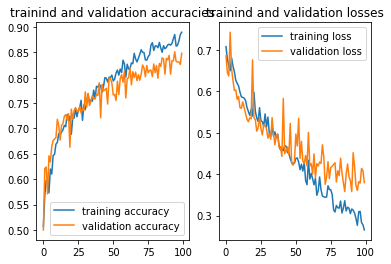

In [ ]:
train_accuracy = history.history["accuracy"]
validation_accuracy = history.history["val_accuracy"]
train_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.subplot(121)
plt.plot(train_accuracy, label="training accuracy")
plt.plot(validation_accuracy, label="validation accuracy")
plt.legend()
plt.title("trainind and validation accuracies")

plt.subplot(122)
plt.plot(train_loss, label="training loss")
plt.plot(validation_loss, label="validation loss")
plt.legend()
plt.title("trainind and validation losses")
plt.show()

**Prediction**



0.   Cat
1.   Dog



In [ ]:

train_data_secondbatchfeatures, train_data_secondbatchlabels = train_data_process[1]


In [ ]:
figs, axis = plt.subplots(100, figsize=(400, 400))
for index in range(len(train_data_secondbatchfeatures)):
  axis[index].imshow(train_data_secondbatchfeatures[index])

Output hidden; open in https://colab.research.google.com to view.

predict  0
0.0
predict  0
0.0
predict  0
0.0
predict  0
1.0
predict  1
1.0
predict  1
1.0
predict  0
0.0
predict  1
1.0
predict  0
0.0
predict  1
1.0
predict  1
1.0
predict  0
0.0
predict  0
0.0
predict  1
1.0
predict  0
0.0
predict  1
1.0
predict  1
1.0
predict  0
0.0
predict  0
0.0
predict  0
0.0
predict  1
1.0
predict  0
0.0
predict  0
1.0
predict  0
1.0
predict  0
0.0
predict  0
0.0
predict  0
0.0
predict  0
0.0
predict  1
0.0
predict  0
0.0
predict  1
1.0
predict  0
0.0
predict  1
1.0
predict  0
0.0
predict  0
0.0
predict  0
0.0
predict  1
1.0
predict  1
1.0
predict  0
0.0
predict  1
1.0
predict  0
0.0
predict  0
0.0
predict  0
0.0
predict  1
1.0
predict  1
1.0
predict  1
1.0
predict  1
1.0
predict  1
1.0
predict  0
0.0
predict  1
1.0
predict  0
1.0
predict  0
0.0
predict  0
0.0
predict  1
1.0
predict  0
0.0
predict  1
1.0
predict  1
1.0
predict  0
0.0
predict  0
0.0
predict  1
1.0
predict  0
1.0
predict  0
0.0
predict  1
1.0
predict  1
1.0
predict  0
0.0
predict  0
0.0
predict  0